# UKBiobank

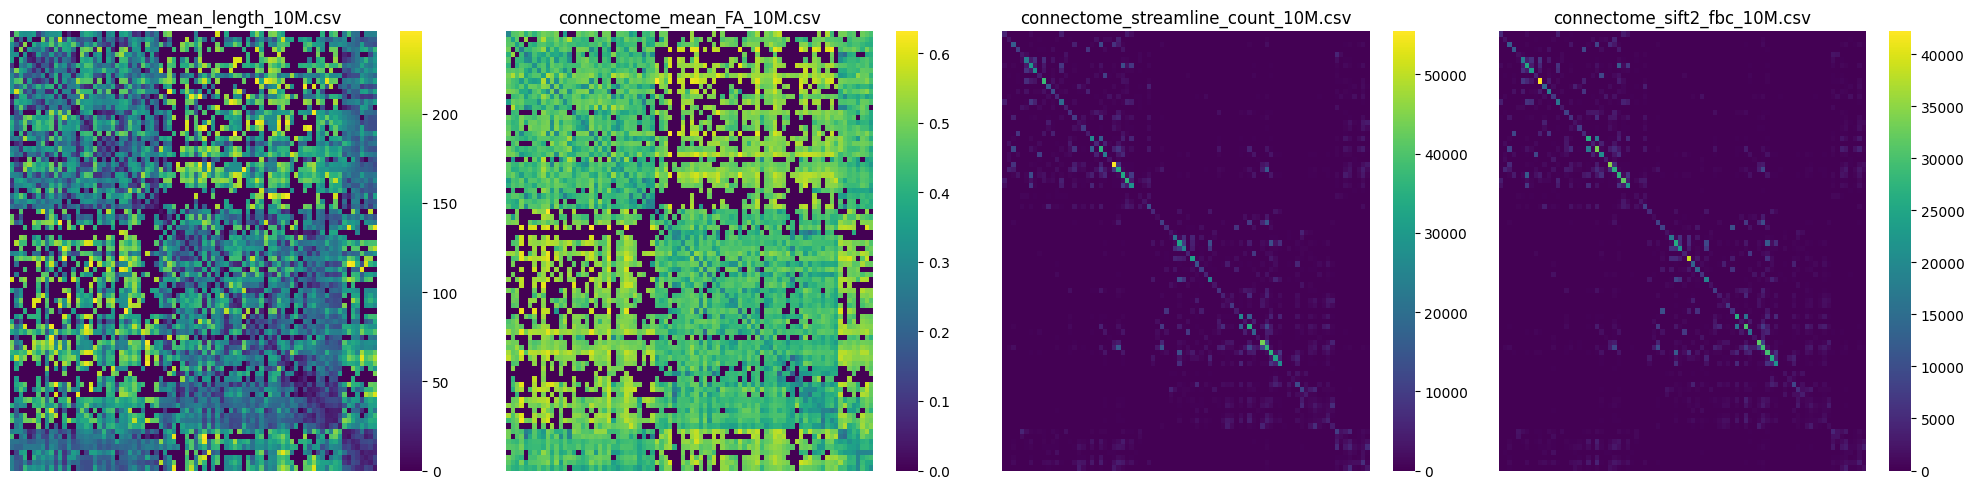

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the directory containing the CSV files
directory_path = '/Users/gitaayusalsabila/Documents/0 Thesis/datasets/sample'  # Replace this with the actual path to your directory
# List to store the connectivity matrices and filenames
connectivity_matrices = []
filenames = []

# Read CSV files and store the connectivity matrices along with their filenames
for file_name in os.listdir(directory_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(directory_path, file_name)
        connectivity_matrix = pd.read_csv(file_path, header=None).values
        connectivity_matrices.append(connectivity_matrix)
        filenames.append(file_name)

# Check if the number of matrices is correct
assert len(connectivity_matrices) == 4, "There should be exactly 4 CSV files."

# Visualize the heatmaps
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, (matrix, filename) in enumerate(zip(connectivity_matrices, filenames)):
    sns.heatmap(matrix, ax=axs[i], cmap='viridis')
    axs[i].set_title(filename)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


# Maturation

Keys in the MAT file:
dict_keys(['__header__', '__version__', '__globals__', 'connectome'])

Key: connectome
Type: <class 'numpy.ndarray'>
Shape: (300, 300)
Data type: float64


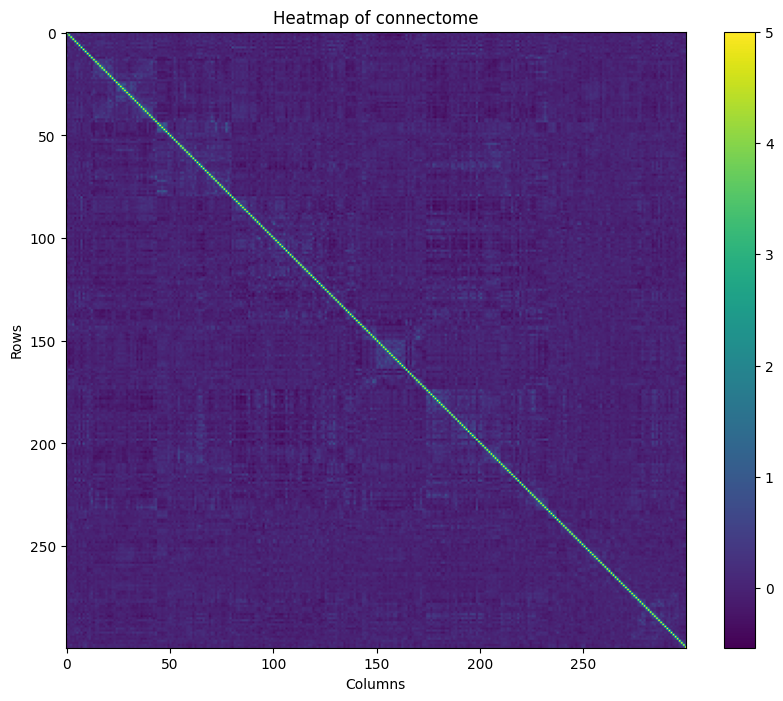

Summary statistics for connectome:
Mean: 0.027412743826805648
Standard Deviation: 0.3213583079493542
Minimum: -0.5331394770566593
Maximum: 5.0


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


mat_data = loadmat('/Users/gitaayusalsabila/Documents/0thesis/datasets/maturation/Connectome/T01/1191.mat')
print("Keys in the MAT file:")
print(mat_data.keys())

# Remove '__header__', '__version__', and '__globals__' if present
data_keys = [key for key in mat_data.keys() if not key.startswith('__')]

# 2. Explore individual arrays
for key in data_keys:
    print(f"\nKey: {key}")
    print(f"Type: {type(mat_data[key])}")
    print(f"Shape: {mat_data[key].shape}")
    print(f"Data type: {mat_data[key].dtype}")

# Example key to visualize
key_of_interest = 'connectome'  # Change this to the actual key containing your data

if key_of_interest in mat_data:
    data = mat_data[key_of_interest]
    
    # Check if the data is 2D
    if data.ndim == 2:
        plt.figure(figsize=(10, 8))
        plt.imshow(data, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Heatmap of {key_of_interest}')
        plt.xlabel('Columns')
        plt.ylabel('Rows')
        plt.show()
    else:
        print(f"The data under key '{key_of_interest}' is not 2D and cannot be visualized as a heatmap.")
else:
    print(f"The key '{key_of_interest}' does not exist in the loaded .mat file.")

# Calculate summary statistics
if key_of_interest in mat_data:
    data = mat_data[key_of_interest]
    
    # Check if the data is numeric
    if np.issubdtype(data.dtype, np.number):
        print(f"Summary statistics for {key_of_interest}:")
        print(f"Mean: {np.mean(data)}")
        print(f"Standard Deviation: {np.std(data)}")
        print(f"Minimum: {np.min(data)}")
        print(f"Maximum: {np.max(data)}")
    else:
        print(f"The data under key '{key_of_interest}' is not numeric and summary statistics cannot be calculated.")
else:
    print(f"The key '{key_of_interest}' does not exist in the loaded .mat file.")


# SLIM

In [8]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.io import loadmat


def extract_data_from_mat(file_path):
    mat_data = loadmat(file_path)
    return mat_data['r']

def traverse_and_extract_complete_sessions(base_path,atlas_name):
    subject_data = []
    subjects = os.listdir(base_path)
    
    for subject in subjects:
        subject_path = os.path.join(base_path, subject)
        if os.path.isdir(subject_path):
            sessions = ['session_1', 'session_2', 'session_3']
            session_data = []
            for session in sessions:
                session_path = os.path.join(subject_path, session)
                if os.path.isdir(session_path):
                    atlas_path = os.path.join(session_path, atlas_name)
                    mat_file_path = os.path.join(atlas_path, 'ROI_FC.mat')
                    if os.path.isfile(mat_file_path):
                        print(f"Extracting data from: {mat_file_path}")
                        data = extract_data_from_mat(mat_file_path)
                        session_data.append(data)
            # Check if all 3 sessions are present
            if len(session_data) == 3:
                subject_data.append(session_data)
    
    return np.array(subject_data)

def show_heatmaps(graphdataset, subjects=[0, 1, 2]):
    fig, axs = plt.subplots(len(subjects), 3, figsize=(15, 5 * len(subjects)))
    
    for i, subject in enumerate(subjects):
        for session in range(3):
            ax = axs[i, session]
            sns.heatmap(graphdataset[subject, session], ax=ax, cmap='viridis')
            ax.set_title(f'Subject {subject+1}, Session {session+1}')
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

def compute_and_plot_distribution(consolidated_data):
    num_subjects, num_sessions, num_nodes, _ = consolidated_data.shape
    session_stats = []

    fig, axs = plt.subplots(1, num_sessions, figsize=(15, 5))

    for session in range(num_sessions):
        session_data = consolidated_data[:, session].reshape(-1, num_nodes, num_nodes)
        session_min = np.min(session_data)
        session_max = np.max(session_data)
        session_mean = np.mean(session_data)
        session_std = np.std(session_data)
        session_stats.append((session_min, session_max, session_mean, session_std))

        # Plot distribution
        ax = axs[session]
        ax.hist(session_data.flatten(), bins=50, color='blue', alpha=0.7)
        ax.set_title(f'Session {session+1} Distribution')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return session_stats
    

### Dosenbach 160

In [9]:
# Base directory containing subject folders
path_160 = '/Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU'  # Replace this with your actual path
atlas_name_160 = 'Dosenbach_160'
# Extract the data
slim160 = traverse_and_extract_complete_sessions(path_160,atlas_name_160)

# Save the consolidated data to a numpy file for later use
np.save('slim160.npy', slim160)

# Print the shape of the consolidated data
print(f"Consolidated data shape: {slim160.shape}")


Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/30805/session_1/Dosenbach_160/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/25712/session_1/Dosenbach_160/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/25712/session_2/Dosenbach_160/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/25712/session_3/Dosenbach_160/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/30802/session_1/Dosenbach_160/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/30802/session_3/Dosenbach_160/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/25715/session_1/Dosenbach_160/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/25715/session_2/Dosenbach_160/ROI_FC.mat
Extracti

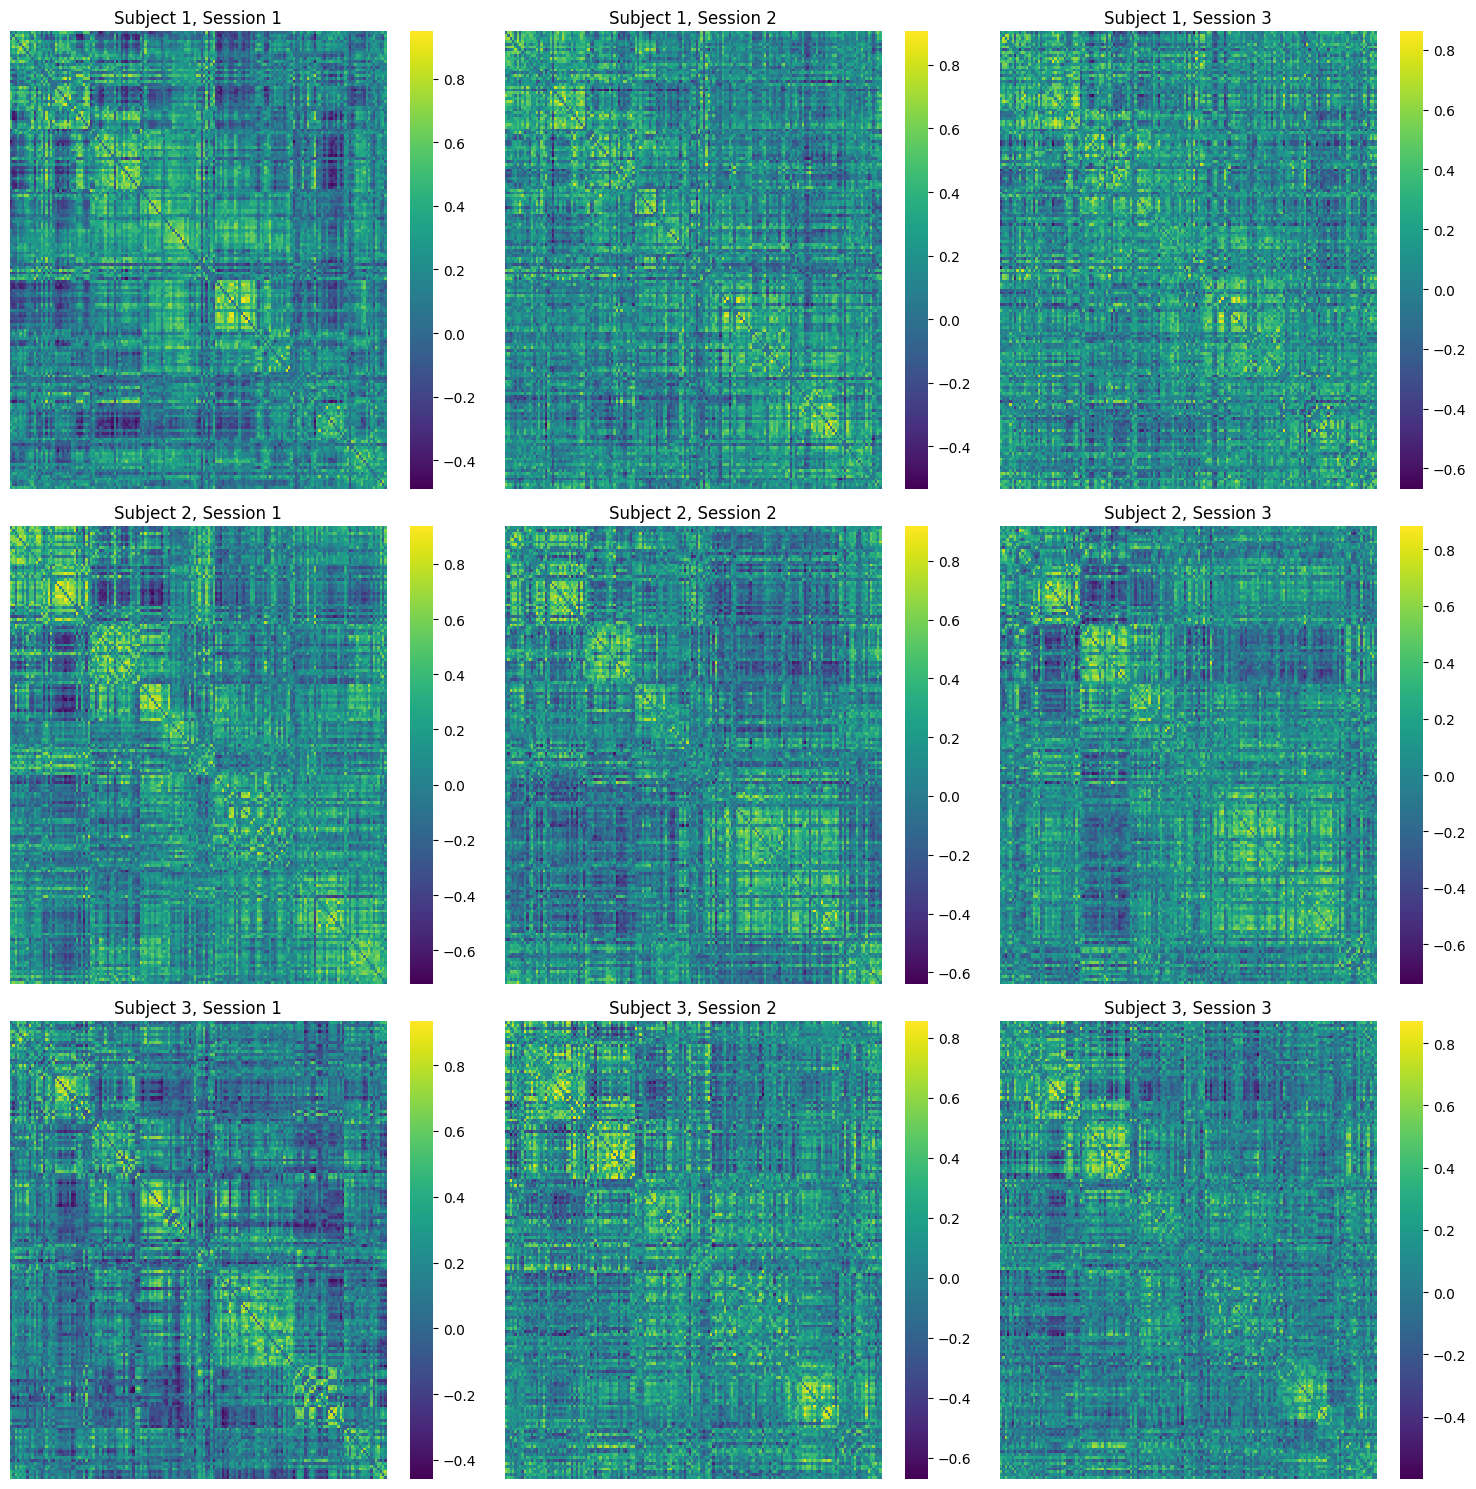

In [10]:
# Load the consolidated data
slim160 = np.load('slim160.npy')
slim160 = np.nan_to_num(slim160, nan=0)

# Show heatmaps for the first 3 subjects
show_heatmaps(slim160, subjects=[0, 1, 2])

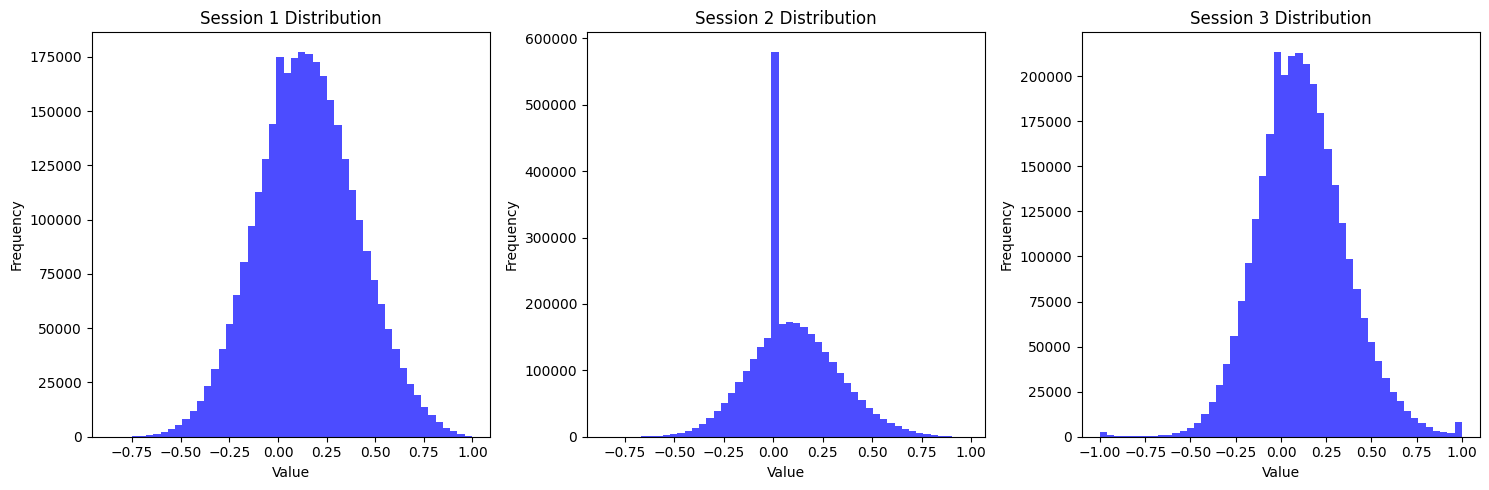

Session 1: Min=-0.863795508442095, Max=0.9970397583029956, Mean=0.15310591843574162, Std=0.25575015891967784
Session 2: Min=-0.84923491877387, Max=0.9781552783568619, Mean=0.09523011351255709, Std=0.21595286422756876
Session 3: Min=-0.9999996333712581, Max=0.9999999928306869, Mean=0.11711980714479128, Std=0.24497226177011325


In [11]:
# Compute statistics and plot distributions
session_stats = compute_and_plot_distribution(slim160)

# Print statistics for each session
for i, stats in enumerate(session_stats):
    print(f'Session {i+1}: Min={stats[0]}, Max={stats[1]}, Mean={stats[2]}, Std={stats[3]}')

### Shen 268

In [12]:
# Base directory containing subject folders
path_268 = '/Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU'  # Replace this with your actual path
atlas_name_268 = 'shen_268'
# Extract the data
slim268 = traverse_and_extract_complete_sessions(path_268,atlas_name_268)

# Save the consolidated data to a numpy file for later use
np.save('slim268.npy', slim268)

# Print the shape of the consolidated data
print(f"Consolidated data shape: {slim268.shape}")


Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/30805/session_1/shen_268/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/25712/session_1/shen_268/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/25712/session_2/shen_268/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/25712/session_3/shen_268/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/30802/session_1/shen_268/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/30802/session_3/shen_268/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/25715/session_1/shen_268/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Documents/0 Thesis/datasets/slim/SWU/25715/session_2/shen_268/ROI_FC.mat
Extracting data from: /Users/gitaayusalsabila/Do

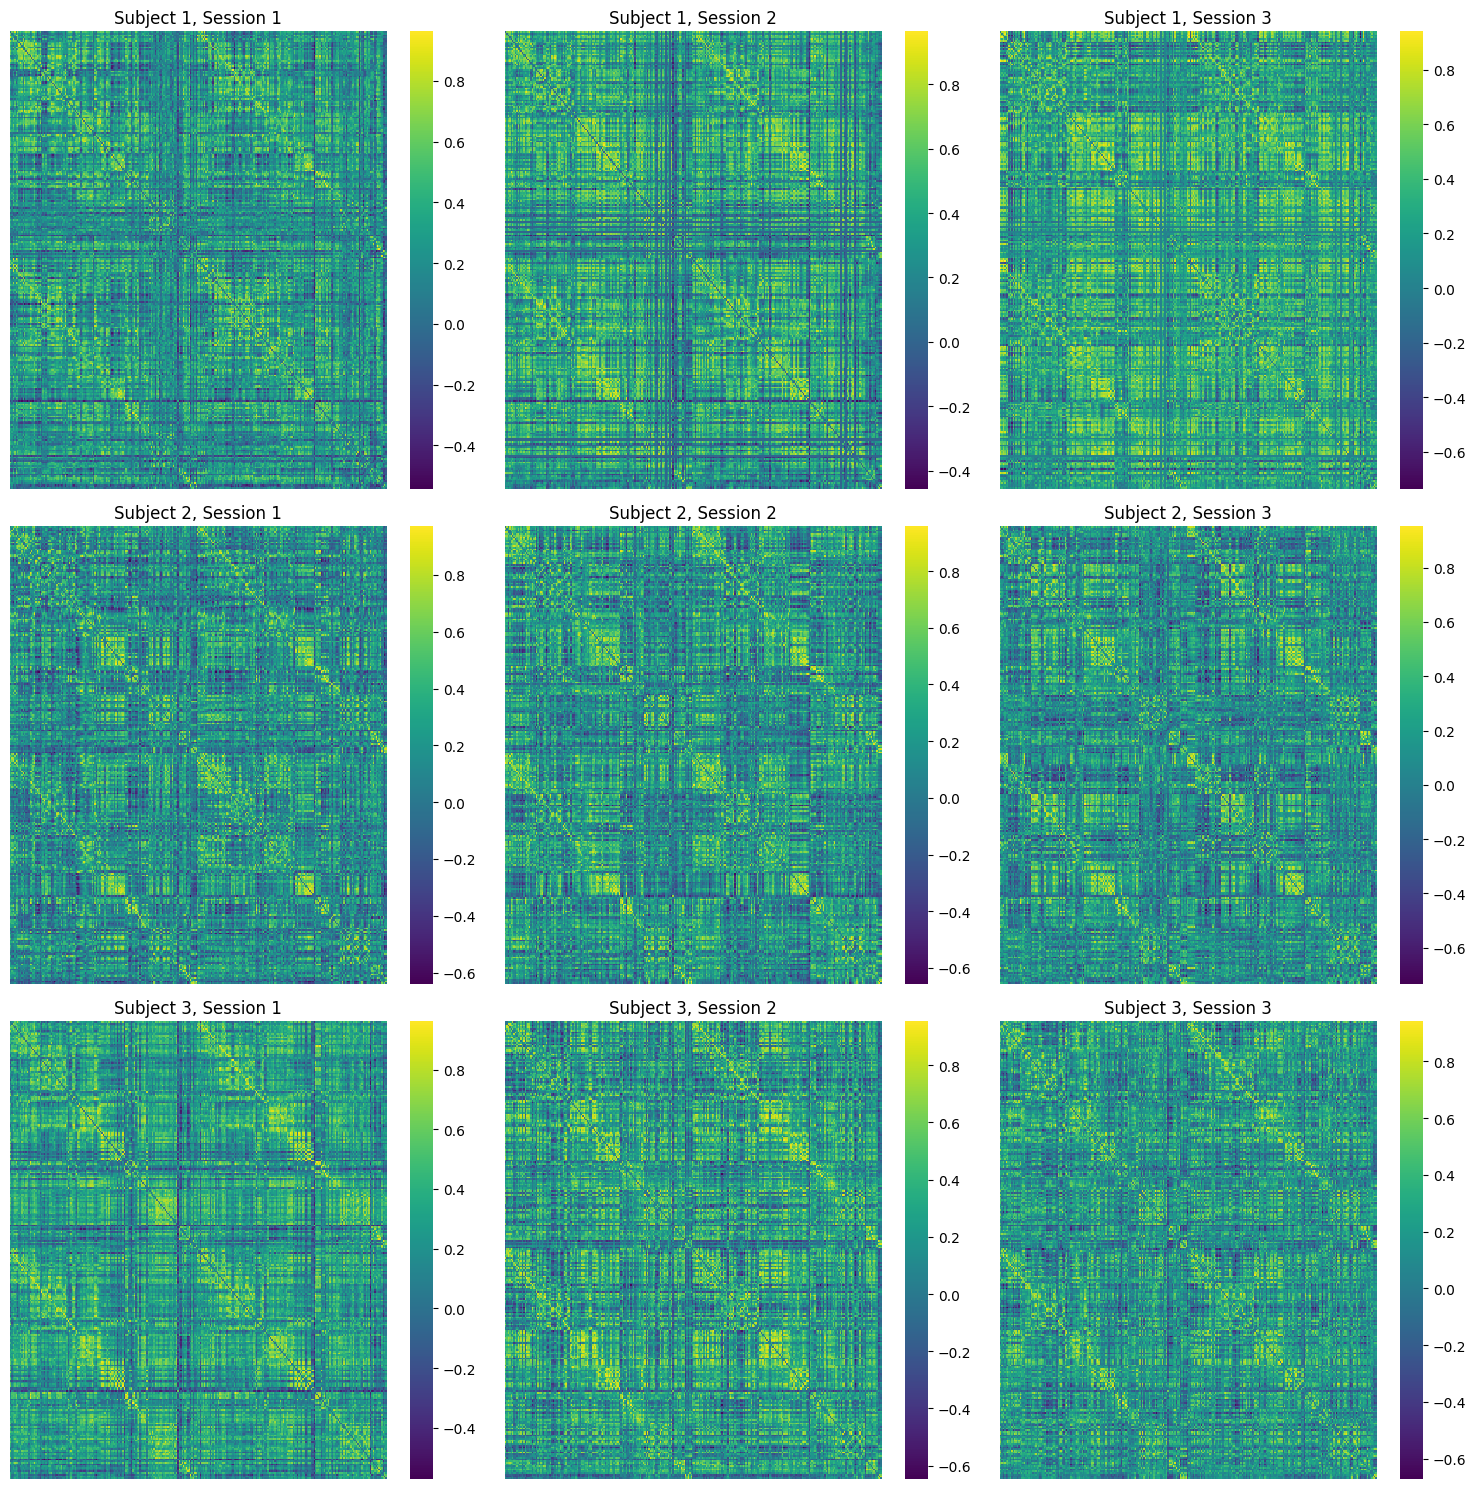

In [13]:
# Load the consolidated data
slim268 = np.load('slim268.npy')
slim268 = np.nan_to_num(slim268, nan=0)

# Show heatmaps for the first 3 subjects
show_heatmaps(slim268, subjects=[0, 1, 2])

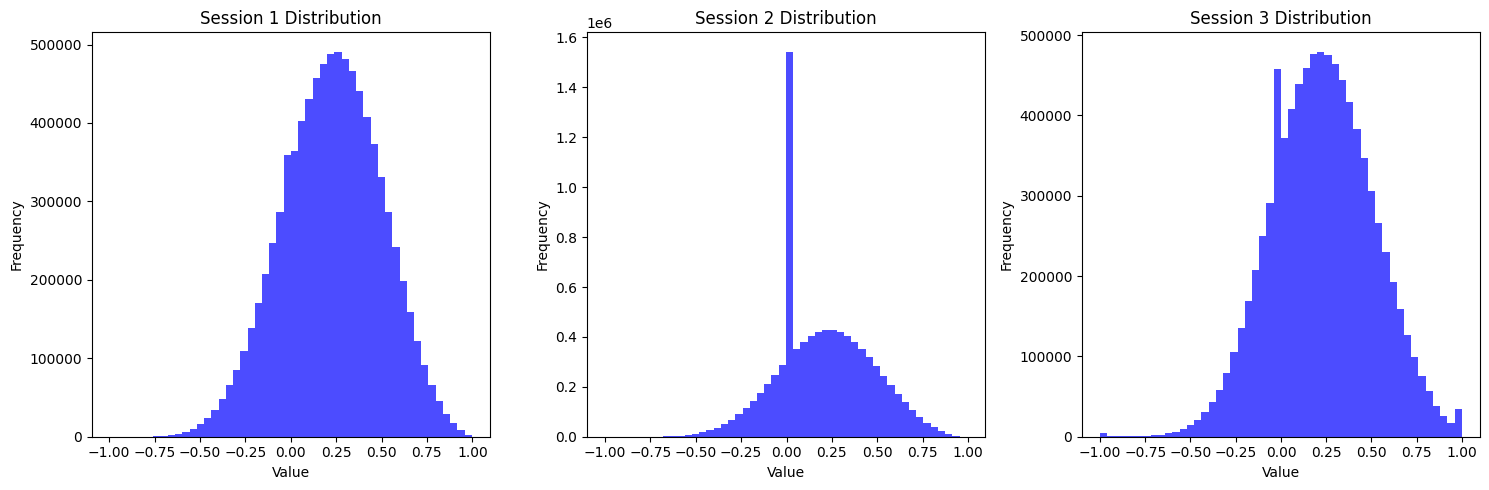

Session 1: Min=-0.9952573850859167, Max=0.9977478494618398, Mean=0.22726160272194232, Std=0.2708685959452025
Session 2: Min=-0.9998917181486331, Max=0.993577981273555, Mean=0.1940934047996848, Std=0.2592885080999434
Session 3: Min=-0.9999999911835071, Max=0.9999999999796488, Mean=0.22666819721202414, Std=0.28068133480421137


In [14]:
# Compute statistics and plot distributions
session_stats = compute_and_plot_distribution(slim268)

# Print statistics for each session
for i, stats in enumerate(session_stats):
    print(f'Session {i+1}: Min={stats[0]}, Max={stats[1]}, Mean={stats[2]}, Std={stats[3]}')

# ReMI-Net (Simulated Dataset)

#### Simulation

In [5]:
import numpy as np
from scipy.stats import multivariate_normal
from random import randint

# Antivectorize given vector into adjacency matrix
def antiVectorize(vec, m):
    M = np.zeros((m,m))
    M[np.tril_indices(m,k=-1)] = vec
    M= M.transpose()
    M[np.tril_indices(m,k=-1)] = vec
    return M

# Vectorize graph adjacency matrix into a vector
def vectorize(M):
    return M[np.tril_indices(M.shape[0], k=-1)]

def multivariate_simulate(n_samples=200,n_time=2,n_views=4):
    # Note that changing the node count is not provided right now, since we use correlation matrix
    # and the mean values of connectivities from real data and it is for 35 nodes.
    
    # Import all required statistical information.
    allstats = np.load("./stats/REALDATA_LH_AVGMEANS.npy") # Connectivity mean values of LH. You can also try with RH.
    allcorrs = np.load("./stats/REALDATA_LH_AVGCORRS.npy") # Correlation matrix in LH. You can also try with RH.
    all_diffs = np.load("./stats/REAL_TIME_DIFF.npy") # This is an overall representation of time differences in both (LH and RH) datasets.
    
    times = []
    for t in range(n_time):
        views = []
        for v in range(n_views):
            # Note that we randomly assign a new random state to ensure it will generate a different dataset at each run.
            # Generate data with the correlations and mean values at the current timepoint.
            if t < 2:
                connectomic_means = allstats[t,v]
                data = multivariate_normal.rvs(connectomic_means,allcorrs[t,v],n_samples,random_state=randint(1,9999))
            # If the requested timepoints are more than we have in real data, use the correlation information from the last timepoint.
            else:
                connectomic_means = allstats[-1,v]
                data = multivariate_normal.rvs(connectomic_means,allcorrs[-1,v],n_samples,random_state=randint(1,9999))

            adj = []
            for idx, sample in enumerate(data):
                # Create adjacency matrix.
                matrix = antiVectorize(sample,35)
                # Perturb the real time difference with nonlinear tanh function.
                noise = np.tanh( t / n_time )
                # Further timepoints will have more significant difference from the baseline (t=6 >> t=1).
                matrix = matrix + all_diffs[:,:,v] * ( noise + 1 )
                adj.append(matrix)
            views.append(np.array(adj))

        times.append(np.array(views))
    
    alldata=np.array(times)
    alldata = np.transpose(alldata,(2,0,3,4,1))
    return alldata 

def prepare_data(new_data=False, n_samples=200, n_times=6):
    # Note that data with 200 samples and 6 timepoints is very large (5.8M data points),
    # check your GPU memory to make sure there is enough space to allocate. If not, try:
    # - to reduce dataset size by changing n_samples or n_times.
    # - on CPU (this will allocate memory on RAM) --> This might work for example if you have 1GB GPU memory but 16GB RAM.
    # - on another computer with a better NVIDIA graphics card. --> 2GB GPU memory will not be enough for 5.8M data.
    try:
        if new_data:
            samples = multivariate_simulate(n_samples,n_times)
            np.save('./multivariate_simulation_data.npy',samples)
        else:
            samples = np.load('./multivariate_simulation_data.npy')
    except:
        samples = multivariate_simulate(n_samples,n_times)
        np.save('./multivariate_simulation_data.npy',samples)
    return samples

In [2]:
X = prepare_data(new_data=True,n_samples=100,n_times=3)

#### EDA

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

X = prepare_data(new_data=False,n_samples=100,n_times=3)

In [3]:
print(X.shape)

(100, 3, 35, 35, 4)


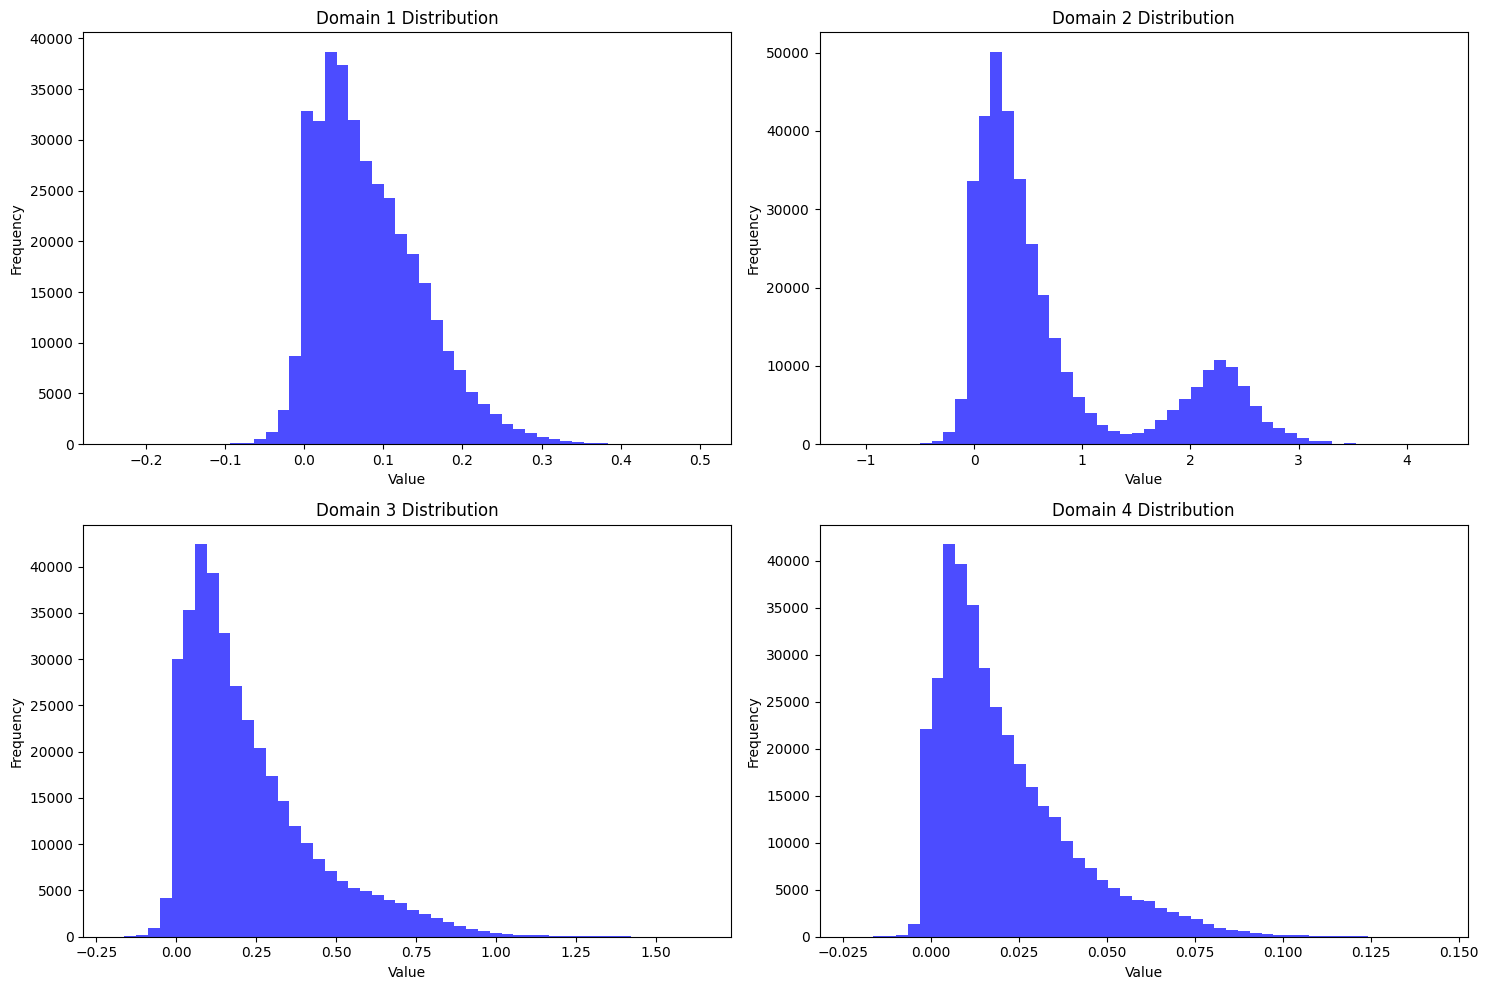

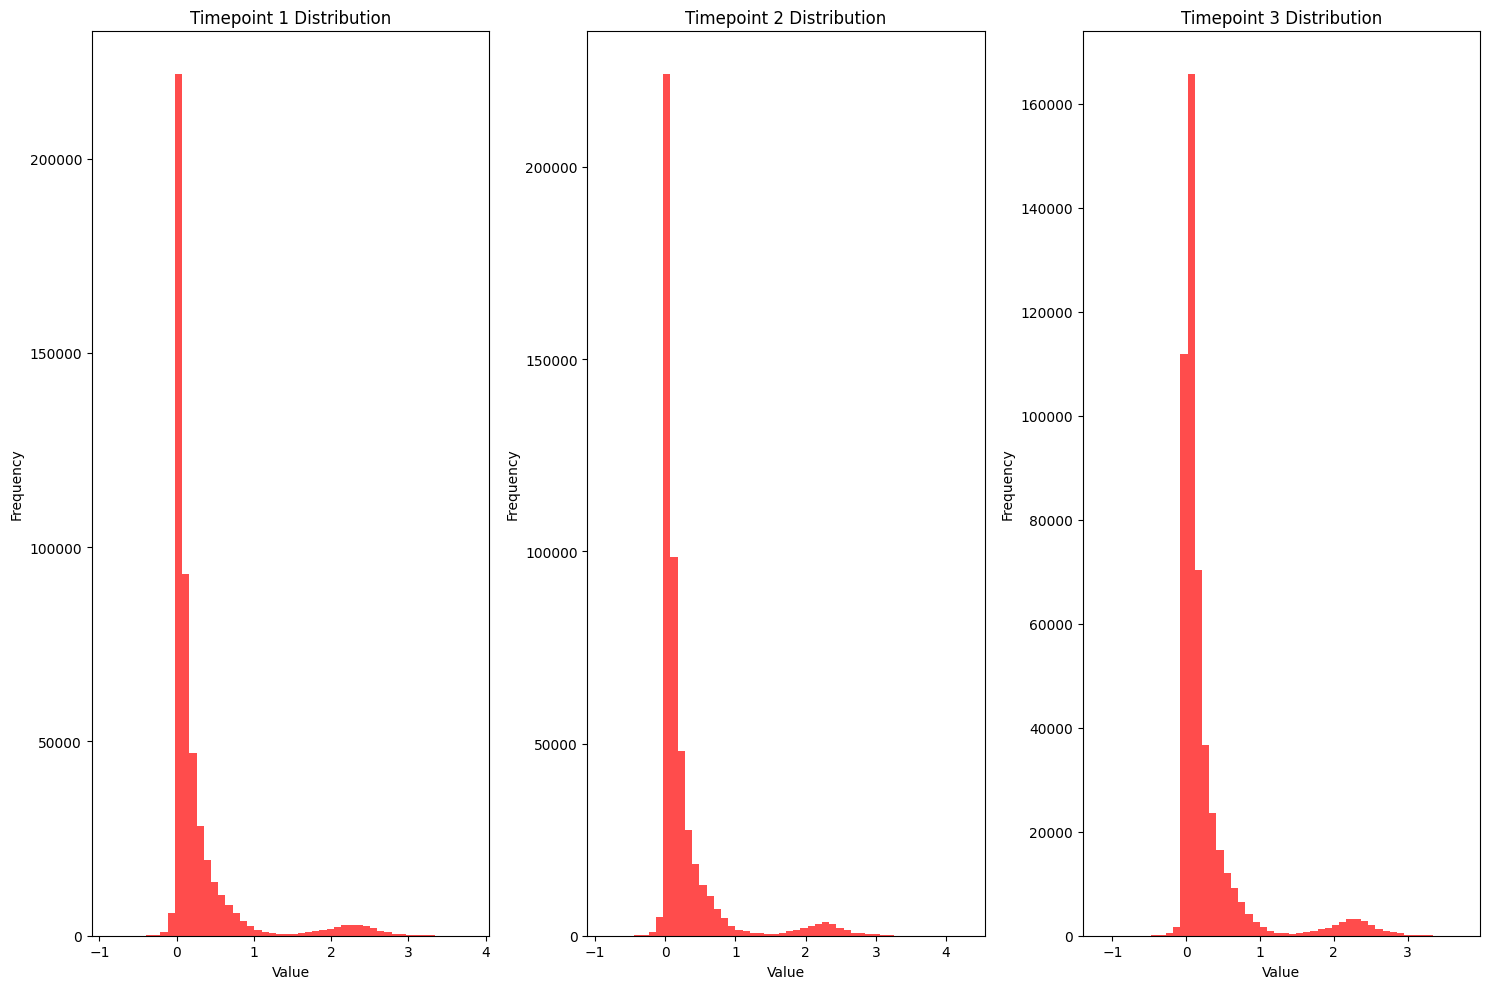

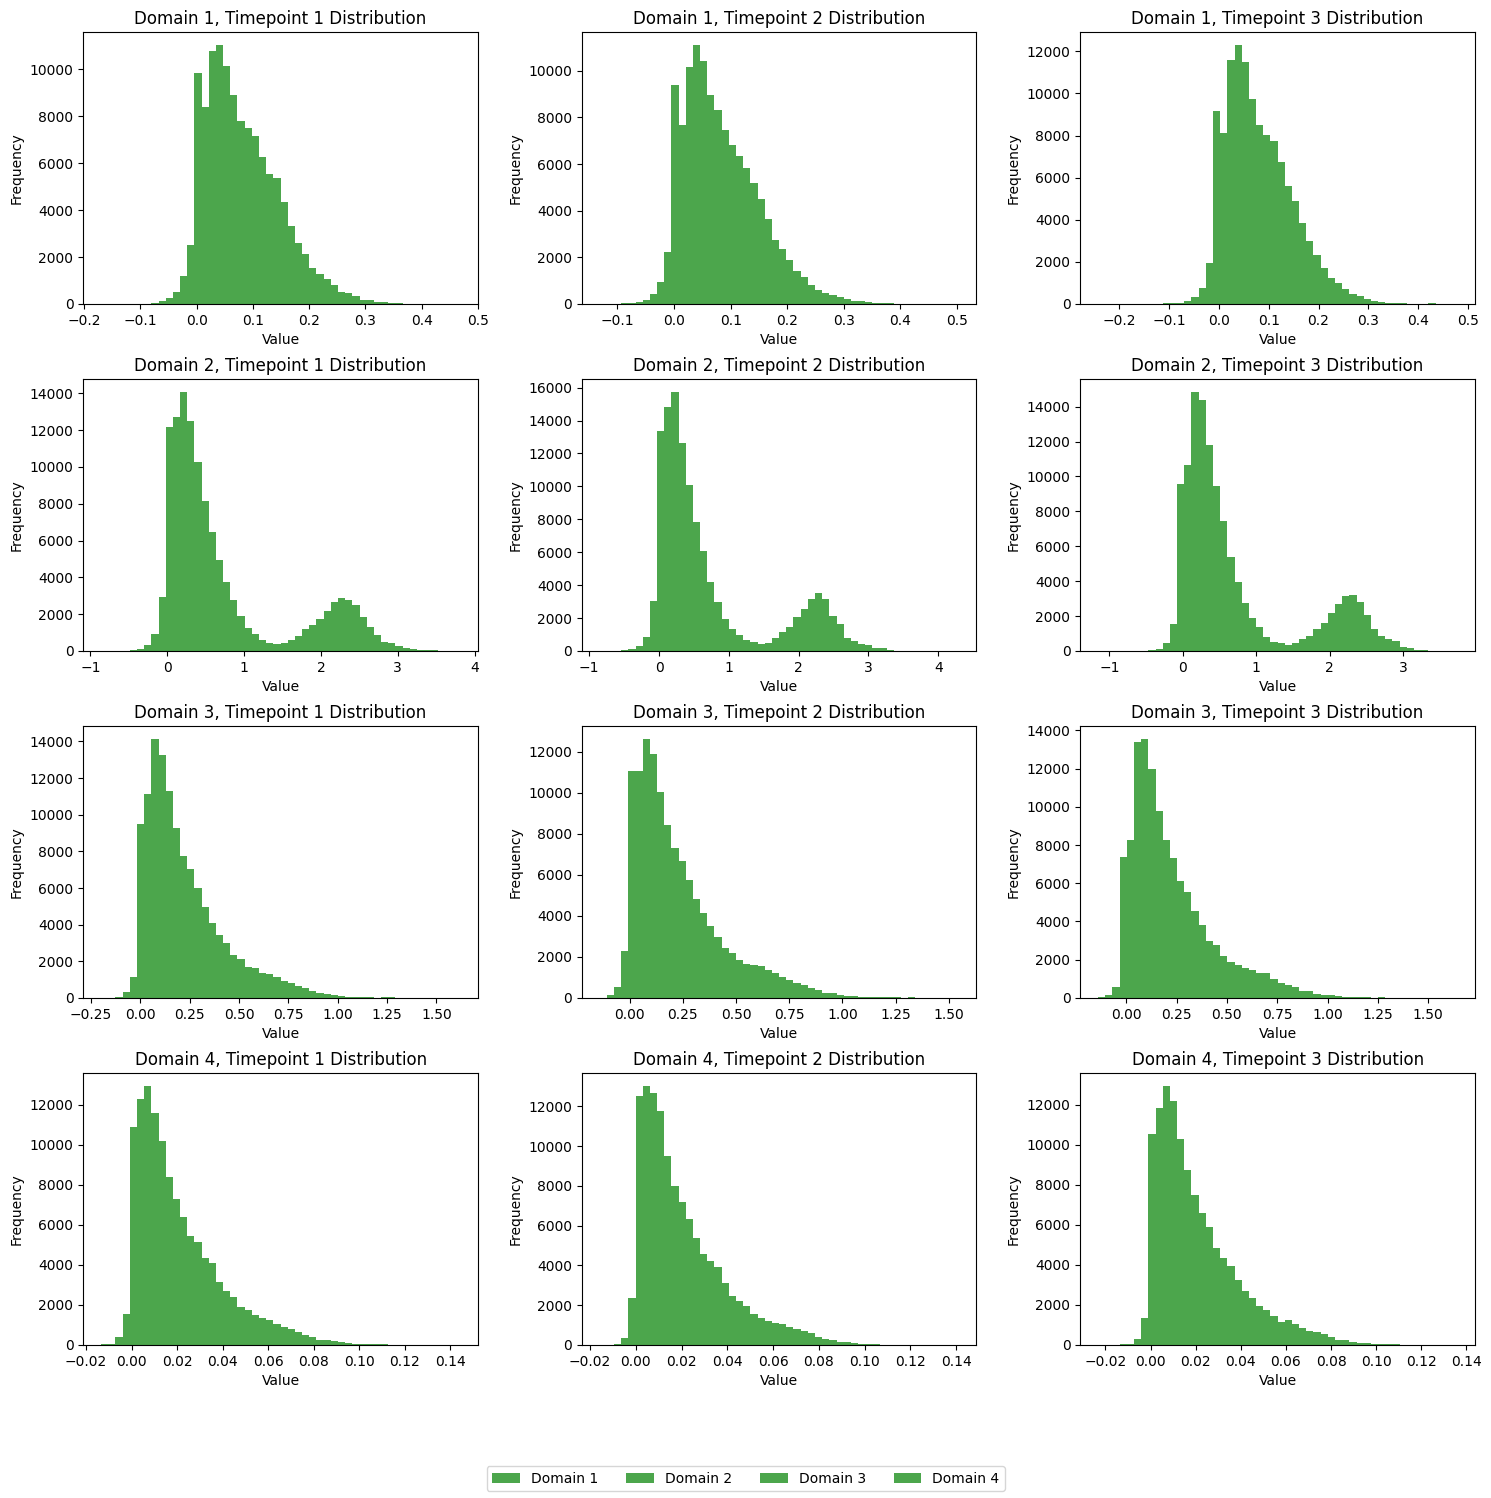

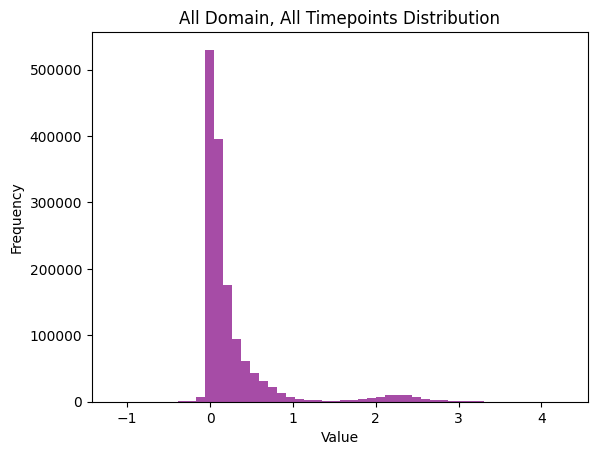

1. Min, max, mean, std of graphs in each domain across all timepoints:
Domain 1: Min=-0.2421, Max=0.5026, Mean=0.0817, Std=0.0669
Domain 2: Min=-1.1548, Max=4.2900, Mean=0.7354, Std=0.8287
Domain 3: Min=-0.1995, Max=1.6432, Mean=0.2282, Std=0.2095
Domain 4: Min=-0.0232, Max=0.1443, Mean=0.0209, Std=0.0190

2. Min, max, mean, std of graphs in each timepoint across all domains:
Timepoint 1: Min=-0.8619, Max=3.8103, Mean=0.2678, Std=0.5153
Timepoint 2: Min=-0.8520, Max=4.2900, Mean=0.2663, Std=0.5120
Timepoint 3: Min=-1.1548, Max=3.7352, Mean=0.2655, Std=0.5107

3. Min, max, mean, std of graphs in each domain and each timepoint:
Domain 1, Timepoint 1: Min=-0.1698, Max=0.4683, Mean=0.0811, Std=0.0661
Domain 1, Timepoint 2: Min=-0.1315, Max=0.5026, Mean=0.0835, Std=0.0673
Domain 1, Timepoint 3: Min=-0.2421, Max=0.4777, Mean=0.0805, Std=0.0671
Domain 2, Timepoint 1: Min=-0.8619, Max=3.8103, Mean=0.7440, Std=0.8313
Domain 2, Timepoint 2: Min=-0.8520, Max=4.2900, Mean=0.7302, Std=0.8295
Domain

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape X to (100, 3, 4, 35, 35) for easier manipulation
X_reshaped = X.transpose(0, 1, 4, 2, 3)

# 1. Min, max, mean, std of graphs in each domain across all timepoints
domain_stats = []
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for domain in range(4):
    domain_data = X_reshaped[:, :, domain].reshape(-1, 35, 35)
    domain_min = np.min(domain_data)
    domain_max = np.max(domain_data)
    domain_mean = np.mean(domain_data)
    domain_std = np.std(domain_data)
    domain_stats.append((domain_min, domain_max, domain_mean, domain_std))

    # Plot distribution
    ax = axs[domain // 2, domain % 2]
    ax.hist(domain_data.flatten(), bins=50, color='blue', alpha=0.7)
    ax.set_title(f'Domain {domain+1} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Min, max, mean, std of graphs in each timepoint across all domains
timepoint_stats = []
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
for timepoint in range(3):
    timepoint_data = X_reshaped[:, timepoint].reshape(-1, 35, 35)
    timepoint_min = np.min(timepoint_data)
    timepoint_max = np.max(timepoint_data)
    timepoint_mean = np.mean(timepoint_data)
    timepoint_std = np.std(timepoint_data)
    timepoint_stats.append((timepoint_min, timepoint_max, timepoint_mean, timepoint_std))

    # Plot distribution
    ax = axs[timepoint]
    ax.hist(timepoint_data.flatten(), bins=50, color='red', alpha=0.7)
    ax.set_title(f'Timepoint {timepoint+1} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Min, max, mean, std of graphs in each domain and each timepoint
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

domain_timepoint_stats = []
for domain in range(4):
    for timepoint in range(3):
        domain_timepoint_data = X_reshaped[:, timepoint, domain].reshape(-1, 35, 35)
        domain_timepoint_min = np.min(domain_timepoint_data)
        domain_timepoint_max = np.max(domain_timepoint_data)
        domain_timepoint_mean = np.mean(domain_timepoint_data)
        domain_timepoint_std = np.std(domain_timepoint_data)
        domain_timepoint_stats.append((domain_timepoint_min, domain_timepoint_max, domain_timepoint_mean, domain_timepoint_std))

        # Plot distribution
        ax = axs[domain, timepoint]
        ax.hist(domain_timepoint_data.flatten(), bins=50, color='green', alpha=0.7)
        ax.set_title(f'Domain {domain+1}, Timepoint {timepoint+1} Distribution')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

plt.tight_layout()
fig.subplots_adjust(bottom=0.1)
plt.figlegend(['Domain 1', 'Domain 2', 'Domain 3', 'Domain 4'], loc='lower center', ncol=4)

plt.show()


# 4. Min, max, mean, std of graphs in all domain and all timepoints globally
all_data = X_reshaped.reshape(-1, 35, 35)
all_min = np.min(all_data)
all_max = np.max(all_data)
all_mean = np.mean(all_data)
all_std = np.std(all_data)

# Plot distribution
plt.hist(all_data.flatten(), bins=50, color='purple', alpha=0.7)
plt.title('All Domain, All Timepoints Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

print("1. Min, max, mean, std of graphs in each domain across all timepoints:")
for domain, stats in enumerate(domain_stats):
    print(f"Domain {domain+1}: Min={stats[0]:.4f}, Max={stats[1]:.4f}, Mean={stats[2]:.4f}, Std={stats[3]:.4f}")

print("\n2. Min, max, mean, std of graphs in each timepoint across all domains:")
for timepoint, stats in enumerate(timepoint_stats):
    print(f"Timepoint {timepoint+1}: Min={stats[0]:.4f}, Max={stats[1]:.4f}, Mean={stats[2]:.4f}, Std={stats[3]:.4f}")

print("\n3. Min, max, mean, std of graphs in each domain and each timepoint:")
for i, stats in enumerate(domain_timepoint_stats):
    domain = i // 3
    timepoint = i % 3
    print(f"Domain {domain+1}, Timepoint {timepoint+1}: Min={stats[0]:.4f}, Max={stats[1]:.4f}, Mean={stats[2]:.4f}, Std={stats[3]:.4f}")

print("\n4. Min, max, mean, std of graphs in all domain and all timepoints globally:")
print(f"All Domain, All Timepoints: Min={all_min:.4f}, Max={all_max:.4f}, Mean={all_mean:.4f}, Std={all_std:.4f}")


In [5]:
def global_normalization(X):
    """
    Perform global normalization on the dataset X.
    
    Parameters:
    X (numpy array): The input data array of shape (num_graphs, num_timepoints, num_nodes, num_nodes, num_domains).
    
    Returns:
    X_normalized (numpy array): The normalized data array with the same shape as X.
    global_mean (float): The global mean of the dataset.
    global_std (float): The global standard deviation of the dataset.
    """
    # Compute the global mean and standard deviation
    global_mean = np.mean(X)
    global_std = np.std(X)
    
    # Normalize the dataset
    X_normalized = (X - global_mean) / global_std
    
    return X_normalized, global_mean, global_std

# Perform global normalization
X_normalized, global_mean, global_std = global_normalization(X)


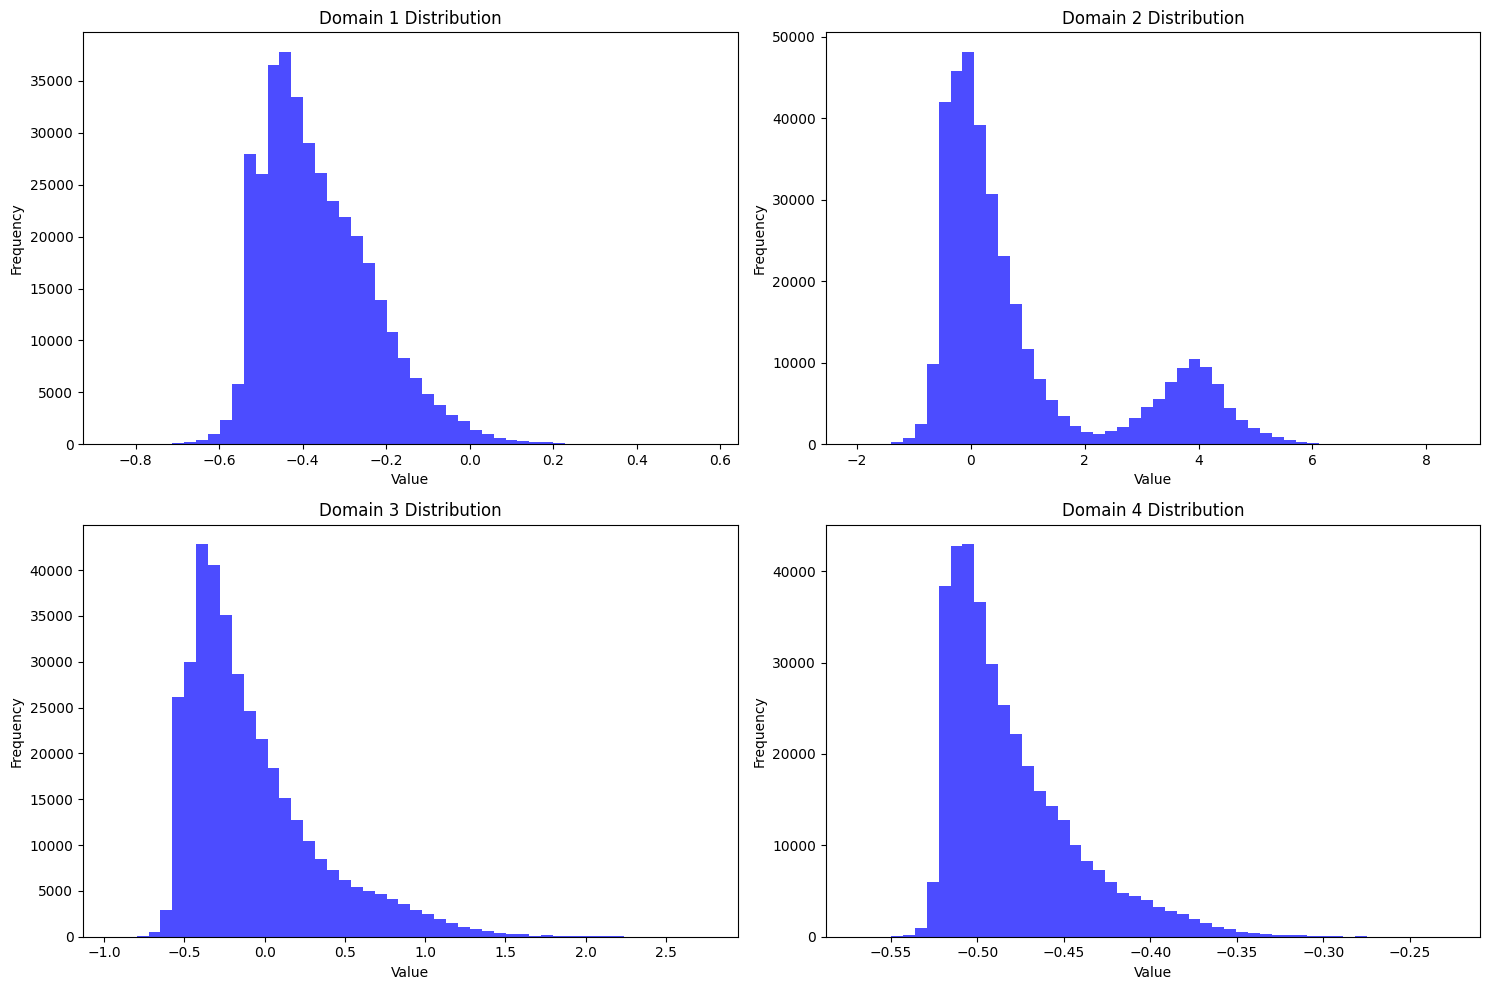

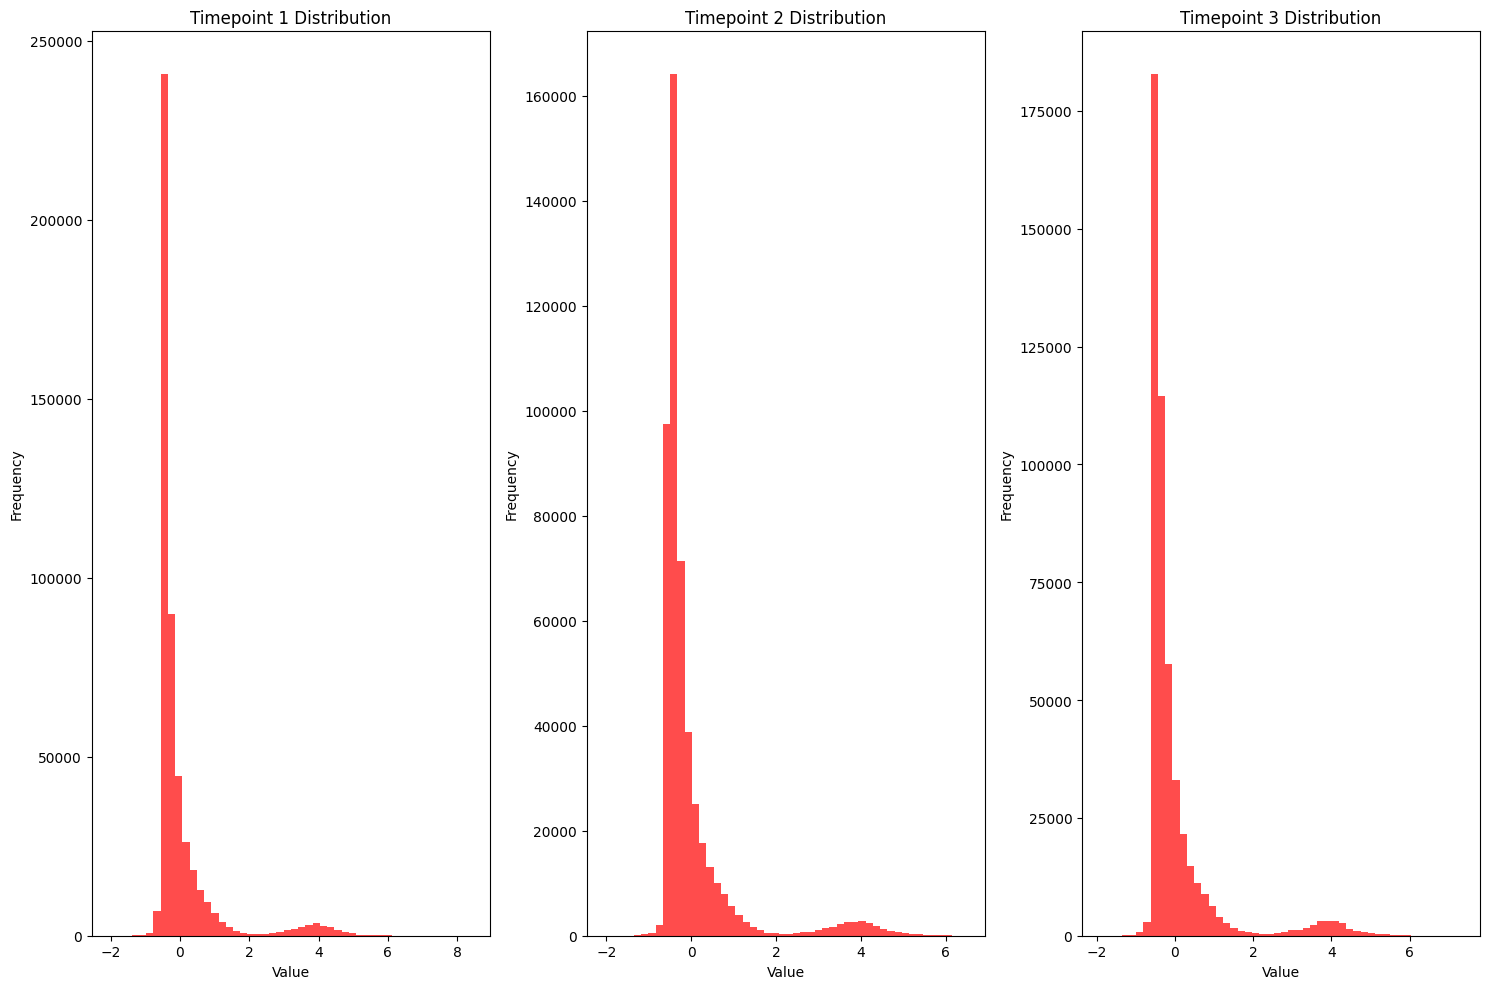

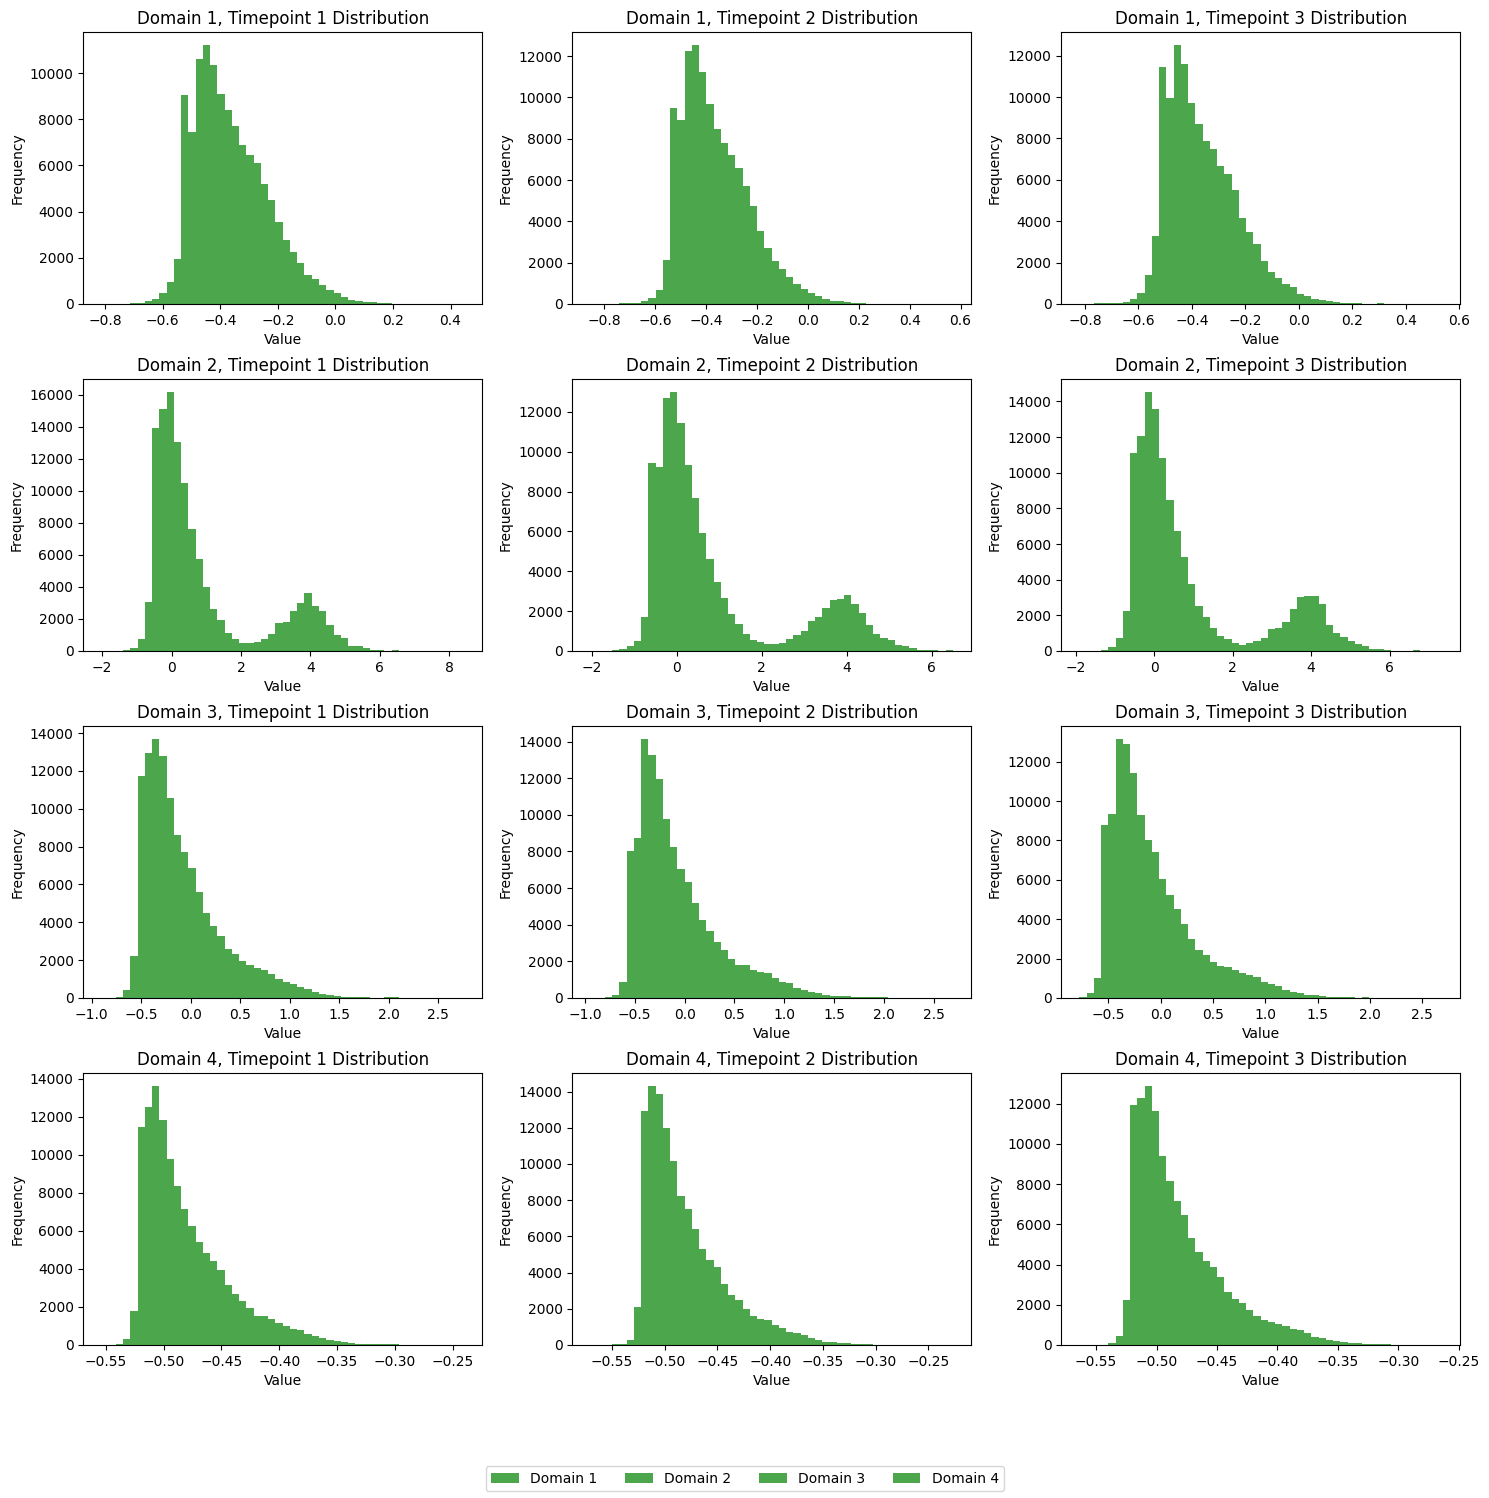

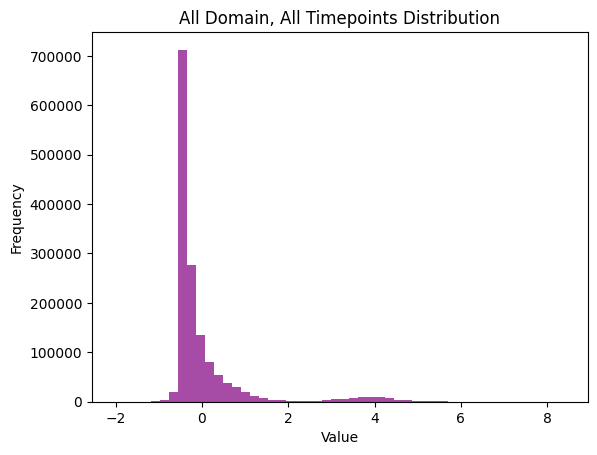

1. Min, max, mean, std of graphs in each domain across all timepoints:
Domain 1: Min=-0.8544329828913558, Max=0.5704919451173031, Mean=-0.36182376787861764, Std=0.13230449963777105
Domain 2: Min=-2.0280045245715965, Max=8.422490684868764, Mean=0.9136383039717423, Std=1.6150357677578726
Domain 3: Min=-0.9456164316210608, Max=2.7619710547347673, Mean=-0.071265162713346, Std=0.4136594044901369
Domain 4: Min=-0.5705633036044593, Max=-0.2265999092064232, Mean=-0.4805493733797775, Std=0.037189678093610776

2. Min, max, mean, std of graphs in each timepoint across all domains:
Timepoint 1: Min=-2.019295246113665, Max=8.422490684868764, Mean=0.001508685230612463, Std=0.9999200681039598
Timepoint 2: Min=-2.0280045245715965, Max=6.502846996056818, Mean=-0.0009281607470080774, Std=0.9986592701720226
Timepoint 3: Min=-1.9112340399109122, Max=7.337467456429464, Mean=-0.0005805244836038192, Std=1.00141701846947

3. Min, max, mean, std of graphs in each domain and each timepoint:
Domain 1, Timepoint 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape X to (100, 3, 4, 35, 35) for easier manipulation
X_reshaped = X_normalized.transpose(0, 1, 4, 2, 3)

# 1. Min, max, mean, std of graphs in each domain across all timepoints
domain_stats = []
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for domain in range(4):
    domain_data = X_reshaped[:, :, domain].reshape(-1, 35, 35)
    domain_min = np.min(domain_data)
    domain_max = np.max(domain_data)
    domain_mean = np.mean(domain_data)
    domain_std = np.std(domain_data)
    domain_stats.append((domain_min, domain_max, domain_mean, domain_std))

    # Plot distribution
    ax = axs[domain // 2, domain % 2]
    ax.hist(domain_data.flatten(), bins=50, color='blue', alpha=0.7)
    ax.set_title(f'Domain {domain+1} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Min, max, mean, std of graphs in each timepoint across all domains
timepoint_stats = []
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
for timepoint in range(3):
    timepoint_data = X_reshaped[:, timepoint].reshape(-1, 35, 35)
    timepoint_min = np.min(timepoint_data)
    timepoint_max = np.max(timepoint_data)
    timepoint_mean = np.mean(timepoint_data)
    timepoint_std = np.std(timepoint_data)
    timepoint_stats.append((timepoint_min, timepoint_max, timepoint_mean, timepoint_std))

    # Plot distribution
    ax = axs[timepoint]
    ax.hist(timepoint_data.flatten(), bins=50, color='red', alpha=0.7)
    ax.set_title(f'Timepoint {timepoint+1} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Min, max, mean, std of graphs in each domain and each timepoint
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

domain_timepoint_stats = []
for domain in range(4):
    for timepoint in range(3):
        domain_timepoint_data = X_reshaped[:, timepoint, domain].reshape(-1, 35, 35)
        domain_timepoint_min = np.min(domain_timepoint_data)
        domain_timepoint_max = np.max(domain_timepoint_data)
        domain_timepoint_mean = np.mean(domain_timepoint_data)
        domain_timepoint_std = np.std(domain_timepoint_data)
        domain_timepoint_stats.append((domain_timepoint_min, domain_timepoint_max, domain_timepoint_mean, domain_timepoint_std))

        # Plot distribution
        ax = axs[domain, timepoint]
        ax.hist(domain_timepoint_data.flatten(), bins=50, color='green', alpha=0.7)
        ax.set_title(f'Domain {domain+1}, Timepoint {timepoint+1} Distribution')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

plt.tight_layout()
fig.subplots_adjust(bottom=0.1)
plt.figlegend(['Domain 1', 'Domain 2', 'Domain 3', 'Domain 4'], loc='lower center', ncol=4)

plt.show()


# 4. Min, max, mean, std of graphs in all domain and all timepoints globally
all_data = X_reshaped.reshape(-1, 35, 35)
all_min = np.min(all_data)
all_max = np.max(all_data)
all_mean = np.mean(all_data)
all_std = np.std(all_data)

# Plot distribution
plt.hist(all_data.flatten(), bins=50, color='purple', alpha=0.7)
plt.title('All Domain, All Timepoints Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

print("1. Min, max, mean, std of graphs in each domain across all timepoints:")
for domain, stats in enumerate(domain_stats):
    print(f"Domain {domain+1}: Min={stats[0]}, Max={stats[1]}, Mean={stats[2]}, Std={stats[3]}")

print("\n2. Min, max, mean, std of graphs in each timepoint across all domains:")
for timepoint, stats in enumerate(timepoint_stats):
    print(f"Timepoint {timepoint+1}: Min={stats[0]}, Max={stats[1]}, Mean={stats[2]}, Std={stats[3]}")

print("\n3. Min, max, mean, std of graphs in each domain and each timepoint:")
for i, stats in enumerate(domain_timepoint_stats):
    domain = i // 3
    timepoint = i % 3
    print(f"Domain {domain+1}, Timepoint {timepoint+1}: Min={stats[0]}, Max={stats[1]}, Mean={stats[2]}, Std={stats[3]}")

print("\n4. Min, max, mean, std of graphs in all domain and all timepoints globally:")
print(f"All Domain, All Timepoints: Min={all_min}, Max={all_max}, Mean={all_mean}, Std={all_std}")


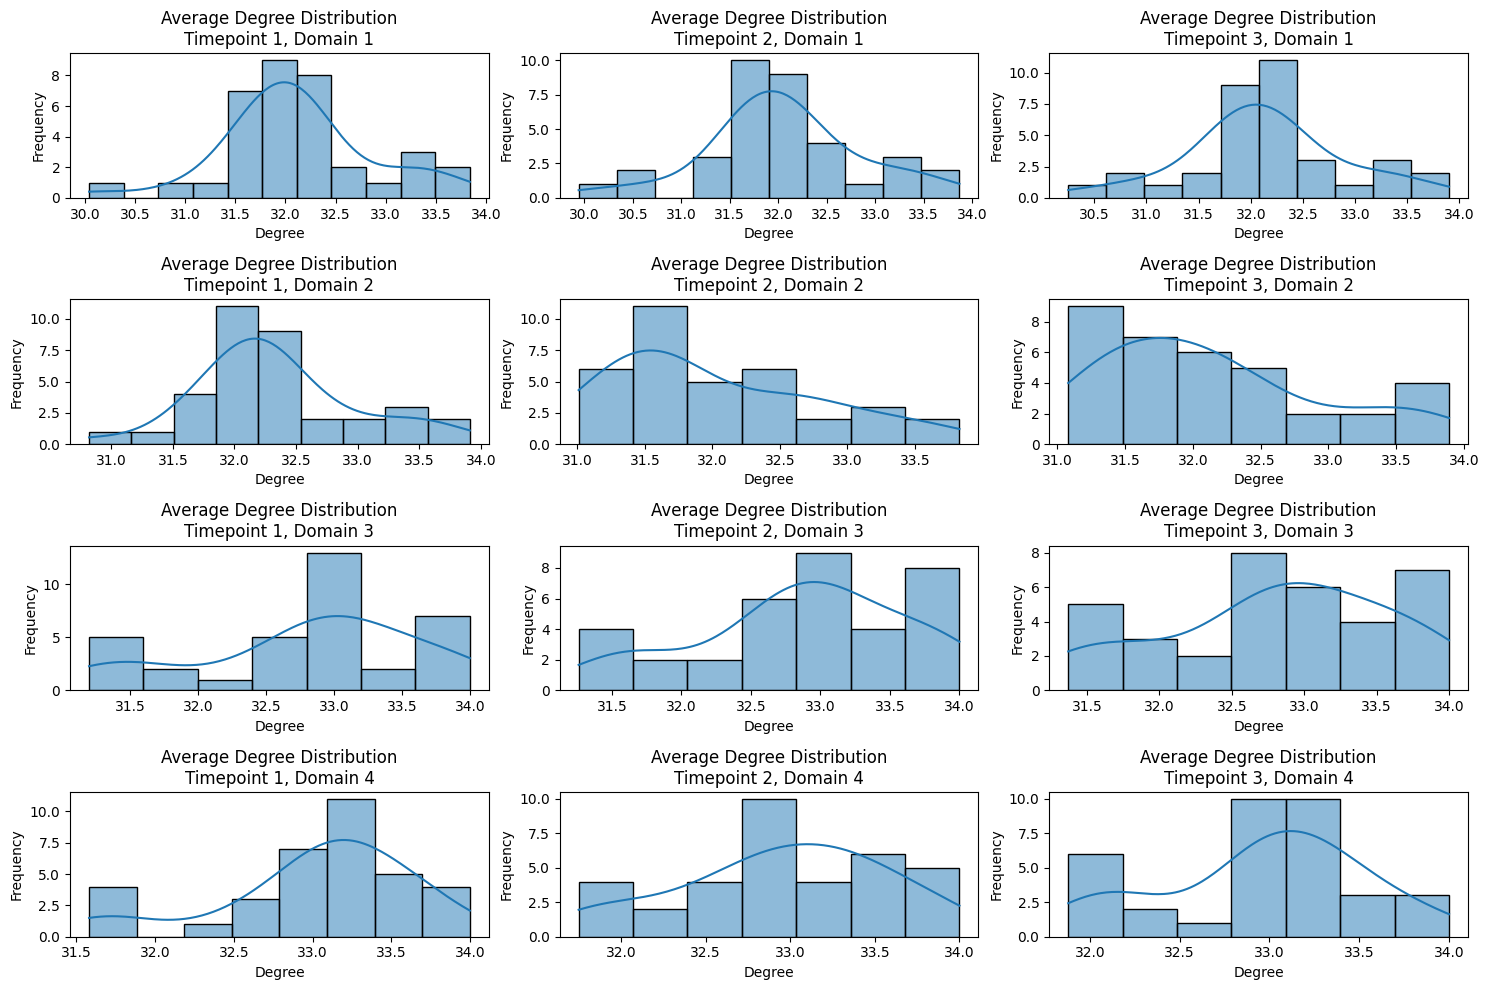

In [29]:
def plot_average_degree_distribution(X):
    num_graphs, num_timepoints, num_nodes, _, num_views = X.shape
    average_degrees = np.zeros((num_views, num_timepoints, num_nodes))
    
    for v in range(num_views):
        for t in range(num_timepoints):
            degrees = np.zeros((num_graphs, num_nodes))
            for g in range(num_graphs):
                adj_matrix = X[g, t, :, :, v]
                degrees[g, :] = np.sum(adj_matrix > 0, axis=1)
            average_degrees[v, t, :] = np.mean(degrees, axis=0)

    fig, axs = plt.subplots(num_views, num_timepoints, figsize=(15, 10))
    for v in range(num_views):
        for t in range(num_timepoints):
            ax = axs[v, t]
            sns.histplot(average_degrees[v, t, :], kde=True, ax=ax)
            ax.set_title(f'Average Degree Distribution\nTimepoint {t+1}, Domain {v+1}')
            ax.set_xlabel('Degree')
            ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_average_degree_distribution(X)

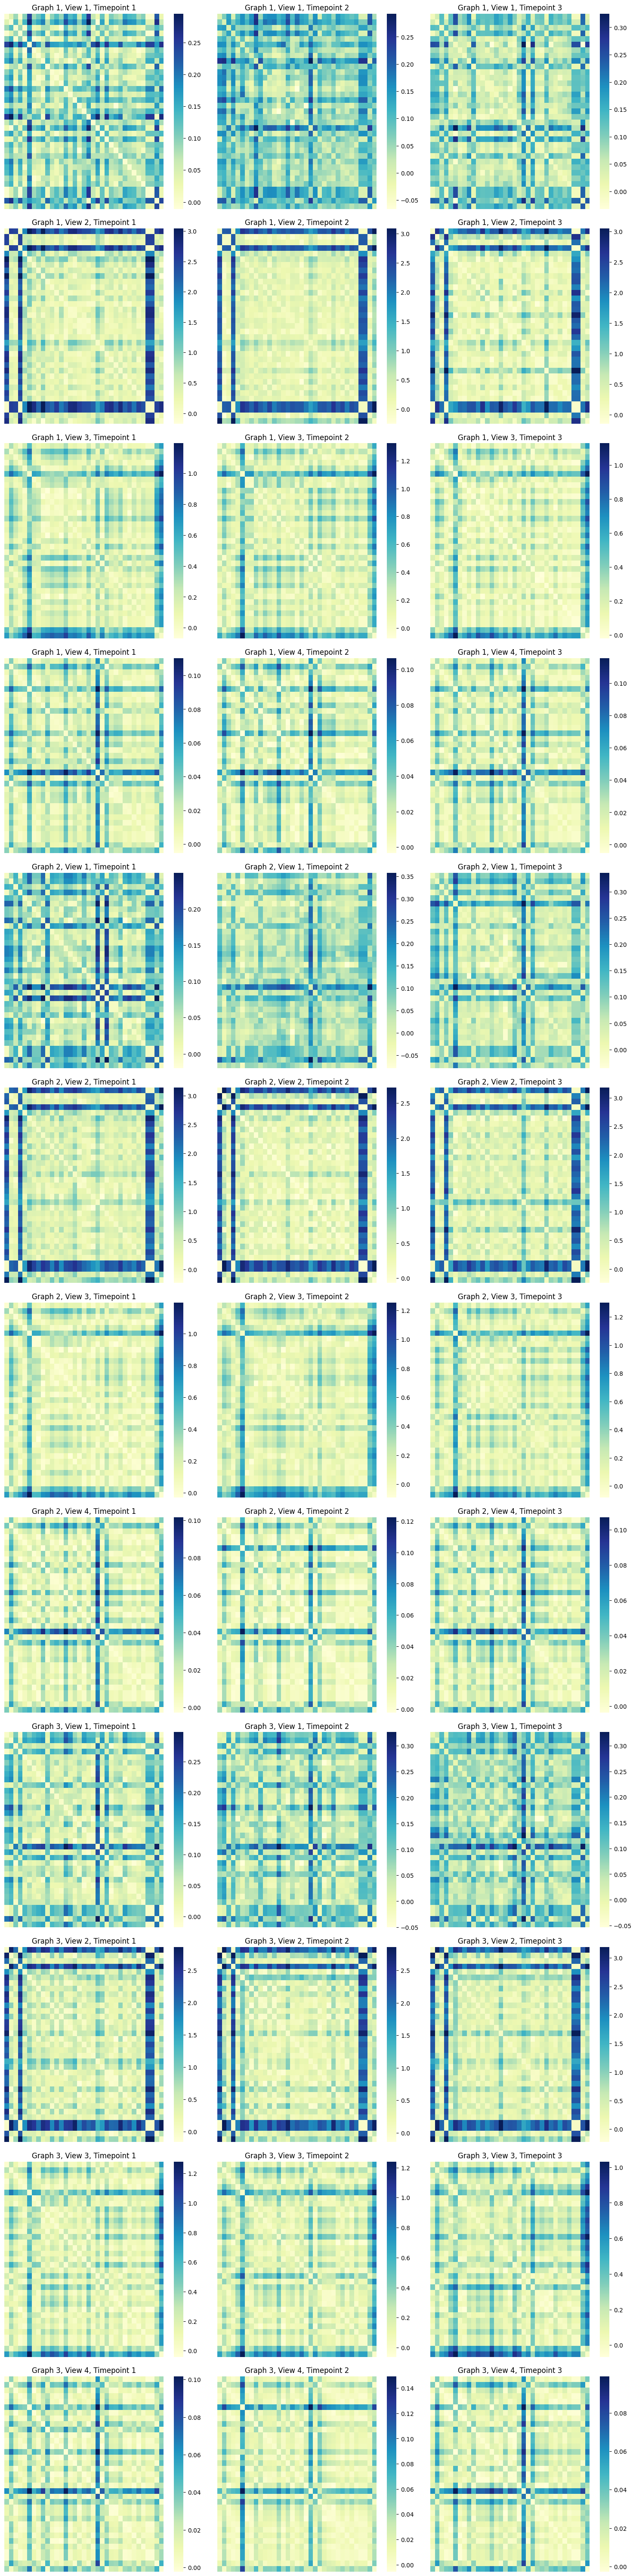

In [33]:
# Visualizing Adjacency Matrices for Each Graph, Time Point, and View
def plot_heatmaps(X, num_samples=3):
    num_graphs, num_timepoints, num_nodes, _, num_views = X.shape
    fig, axs = plt.subplots(num_samples * num_views, num_timepoints, figsize=(15, 5 * num_samples * num_views))
    
    for i in range(num_samples):
        for v in range(num_views):
            for t in range(num_timepoints):
                ax = axs[i * num_views + v, t]
                sns.heatmap(X[i, t, :, :, v], ax=ax, cmap="YlGnBu")
                ax.set_title(f"Graph {i+1}, View {v+1}, Timepoint {t+1}")
                ax.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_heatmaps(X, num_samples=3)

##### Further EDA

In [ ]:
# Visualizing Adjacency Matrices for Each Graph, Time Point, and View
def plot_heatmaps(X, domain_index, num_samples=3):
    num_graphs, num_timepoints, num_nodes, _, num_views = X.shape
    fig, axs = plt.subplots(num_samples, num_timepoints, figsize=(5 * num_timepoints, 5 * num_samples))
    
    for i in range(num_samples):
        for t in range(num_timepoints):
            ax = axs[i, t]
            sns.heatmap(X[i, t, :, :, domain_index], ax=ax, cmap="YlGnBu")
            ax.set_title(f"Graph {i+1}, Domain {domain_index+1}, Timepoint {t+1}")
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_heatmaps(X, domain_index=3, num_samples=3)

In [18]:
def calculate_surprise_index(X):
    num_graphs, num_timepoints, num_nodes, _, num_views = X.shape
    surprise_indices = np.zeros((num_graphs, num_timepoints - 1, num_views))
    
    for g in range(num_graphs):
        for v in range(num_views):
            for t in range(1, num_timepoints):
                prev_adj_matrix = X[g, t - 1, :, :, v]
                current_adj_matrix = X[g, t, :, :, v]
                new_edges = (current_adj_matrix > 0) & (prev_adj_matrix == 0)
                surprise_indices[g, t - 1, v] = np.sum(new_edges)
                
    return surprise_indices

# Calculate surprise indices
surprise_indices = calculate_surprise_index(X)
avg_surprise_indices = np.mean(surprise_indices, axis=0)
print("Surprise Indices:\n", avg_surprise_indices)

Surprise Indices:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
